### Классификация данных о благополучии студентов по предмету Машинное обучение и Большие данные. 

Выполнил Кабанов Илья, 22П-2

Разработка моделей машинного обучения для оценки психического благополучия студентов. В основе исследования — анализ синтетического набора данных, имитирующего крупномасштабный опрос 100 000 студентов. Исследуется взаимосвязь образа жизни и академической успеваемости с психоэмоциональным состоянием. Цель — создать и сравнить эффективность классической модели классификации и нейронной сети для прогнозирования ментального состояния студентов по их объективным характеристикам.

### 1. Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import tensorflow as tf
from tensorflow import keras

### 2. Загрузка данных

In [5]:
df = pd.read_csv("student_lifestyle_100k.csv")
df.head()

,Student_ID,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression
0,1001,22,Female,Science,3.50,7.3,3.3,3.4,114,5,False
1,1002,20,Male,Engineering,2.72,5.5,7.2,6.0,142,2,False
2,1003,20,Male,Medical,3.01,5.4,2.3,1.8,137,3,False
3,1004,21,Male,Engineering,3.63,8.1,2.0,4.6,130,3,False
4,1005,19,Male,Arts,3.14,6.8,2.6,4.3,4,6,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Student_ID          100000 non-null  int64  
 1   Age                 100000 non-null  int64  
 2   Gender              100000 non-null  object 
 3   Department          100000 non-null  object 
 4   CGPA                100000 non-null  float64
 5   Sleep_Duration      100000 non-null  float64
 6   Study_Hours         100000 non-null  float64
 7   Social_Media_Hours  100000 non-null  float64
 8   Physical_Activity   100000 non-null  int64  
 9   Stress_Level        100000 non-null  int64  
 10  Depression          100000 non-null  bool   
dtypes: bool(1), float64(4), int64(4), object(2)
memory usage: 7.7+ MB


In [7]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [8]:
df.describe(include='all')

,Student_ID,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression
count,100000.0000,100000.0000,100000,100000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000.0000,100000
unique,NaN,NaN,2,5,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,Male,Science,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,50120,20071,NaN,NaN,NaN,NaN,NaN,NaN,89938
mean,51000.5000,21.0090,NaN,NaN,2.8983,6.9964,4.5095,3.5033,74.3532,4.1317,NaN
std,28867.6578,2.0004,NaN,NaN,0.5322,1.4987,1.9761,1.4869,43.3670,1.4242,NaN
min,1001.0000,18.0000,NaN,NaN,1.5600,3.0000,0.0000,0.0000,0.0000,2.0000,NaN
25%,26000.7500,19.0000,NaN,NaN,2.4500,6.0000,3.2000,2.5000,37.0000,3.0000,NaN
50%,51000.5000,21.0000,NaN,NaN,2.9000,7.0000,4.5000,3.5000,74.0000,4.0000,NaN
75%,76000.2500,23.0000,NaN,NaN,3.3500,8.0000,5.8000,4.5000,112.0000,5.0000,NaN


Набор данных содержит 100 000 строк и 11 столбцов без пропущенных значений.

* Student_ID	Уникальный идентификатор для каждого студента
* Age  Возраст студента (18-24)
* Gender	Пол учащегося (мужской/женский)
* Department	Область обучения (Инжиниринг, Бизнес, Искусство и др.)
* CGPA	Совокупный средний балл (1,56-4,0)
* Sleep_Duration	Среднее количество часов сна за ночь
* Study_Hours	Среднее количество часов, затраченных на обучение в день
* Social_Media_Hours	Среднее количество часов, проведенных в социальных сетях в день
* Physical_Activity	Средние минуты физической активности в неделю
* Stress_Level	Уровень стресса по самооценке (2-10)
* Depression	Состояние психического здоровья (истина = вероятная депрессия, ложь = здоровый)


Средние показатели студента в выборке: возраст 21 год, GPA 2.9, 7 часов сна, 4.5 часа учёбы в день, 3.5 часа в соцсетях, 75 часов физ. активности в неделю, субъективный уровень стресса — 4 балла.

### 3. Визуализация

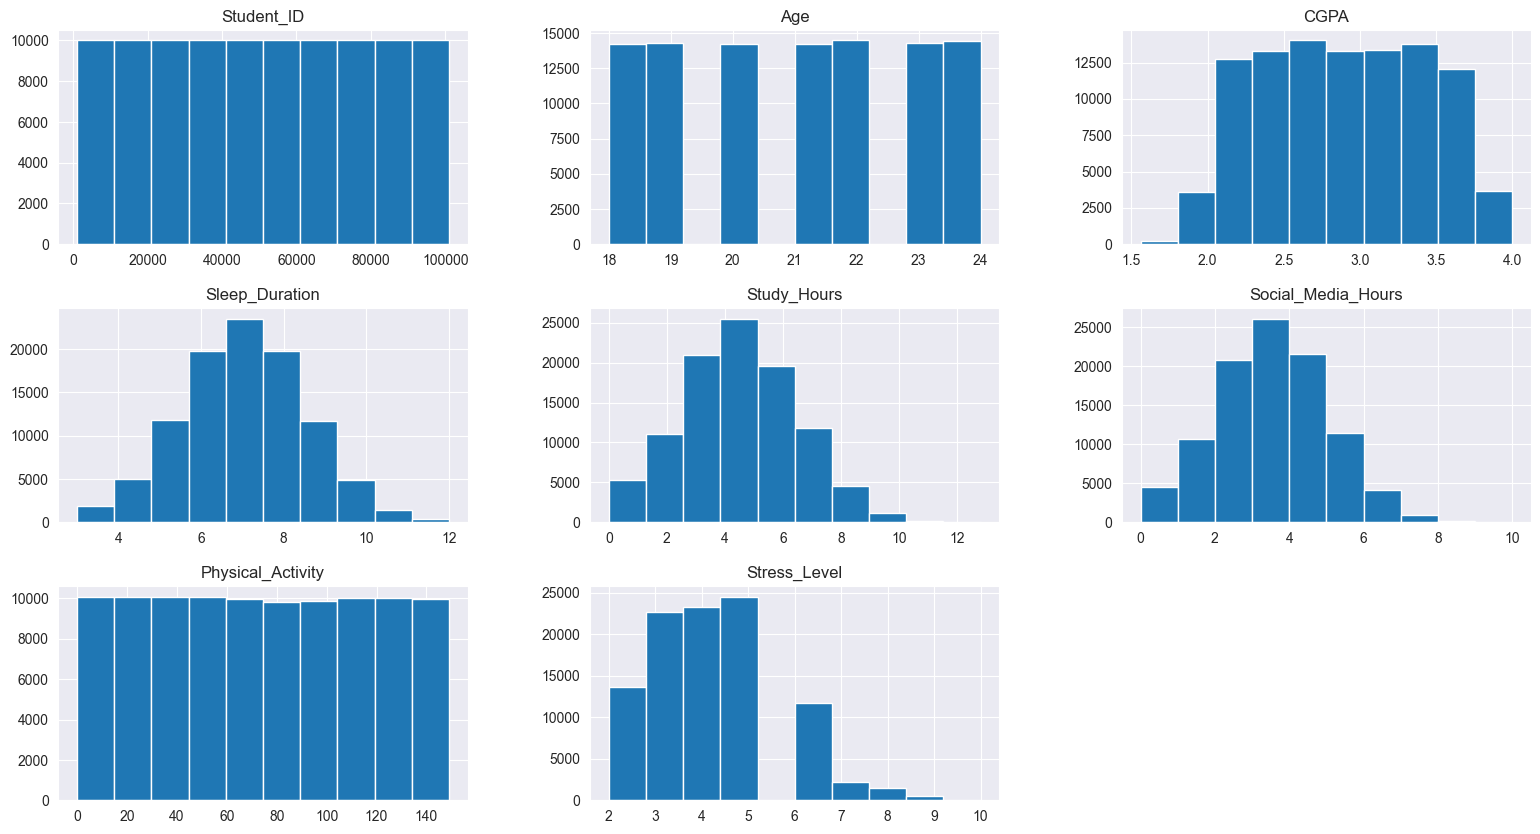

In [9]:
df.hist(figsize=(19,10));

<Axes: xlabel='Depression', ylabel='count'>

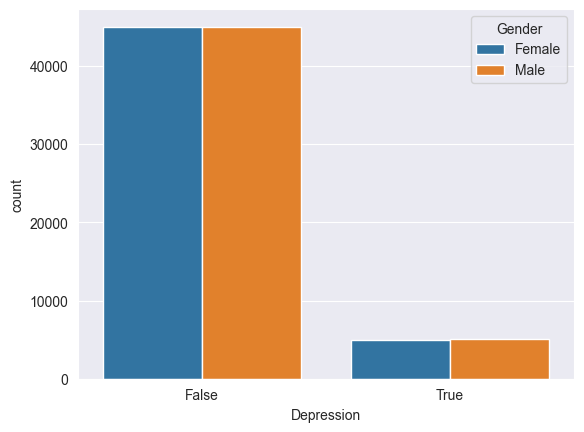

In [10]:
sns.countplot(data = df, x ="Depression", hue = "Gender")

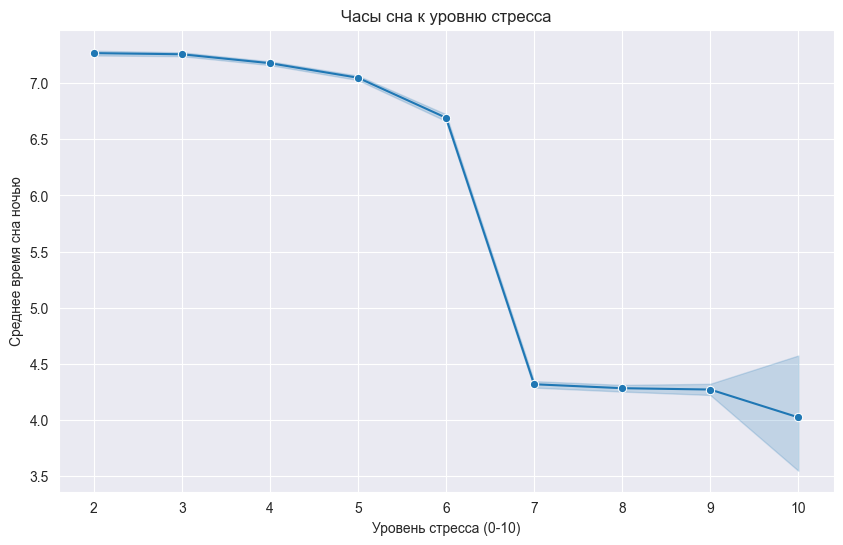

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Stress_Level', y='Sleep_Duration', data=df, marker='o')
plt.title('Часы сна к уровню стресса')
plt.xlabel('Уровень стресса (0-10)')
plt.ylabel('Среднее время сна ночью')
plt.show()

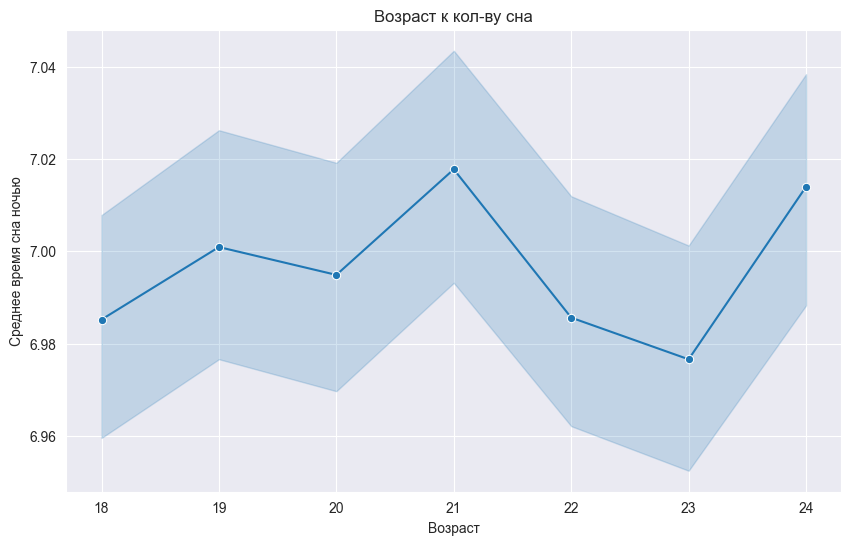

In [12]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Sleep_Duration', data=df, marker='o')
plt.title('Возраст к кол-ву сна')
plt.xlabel('Возраст')
plt.ylabel('Среднее время сна ночью')
plt.show()

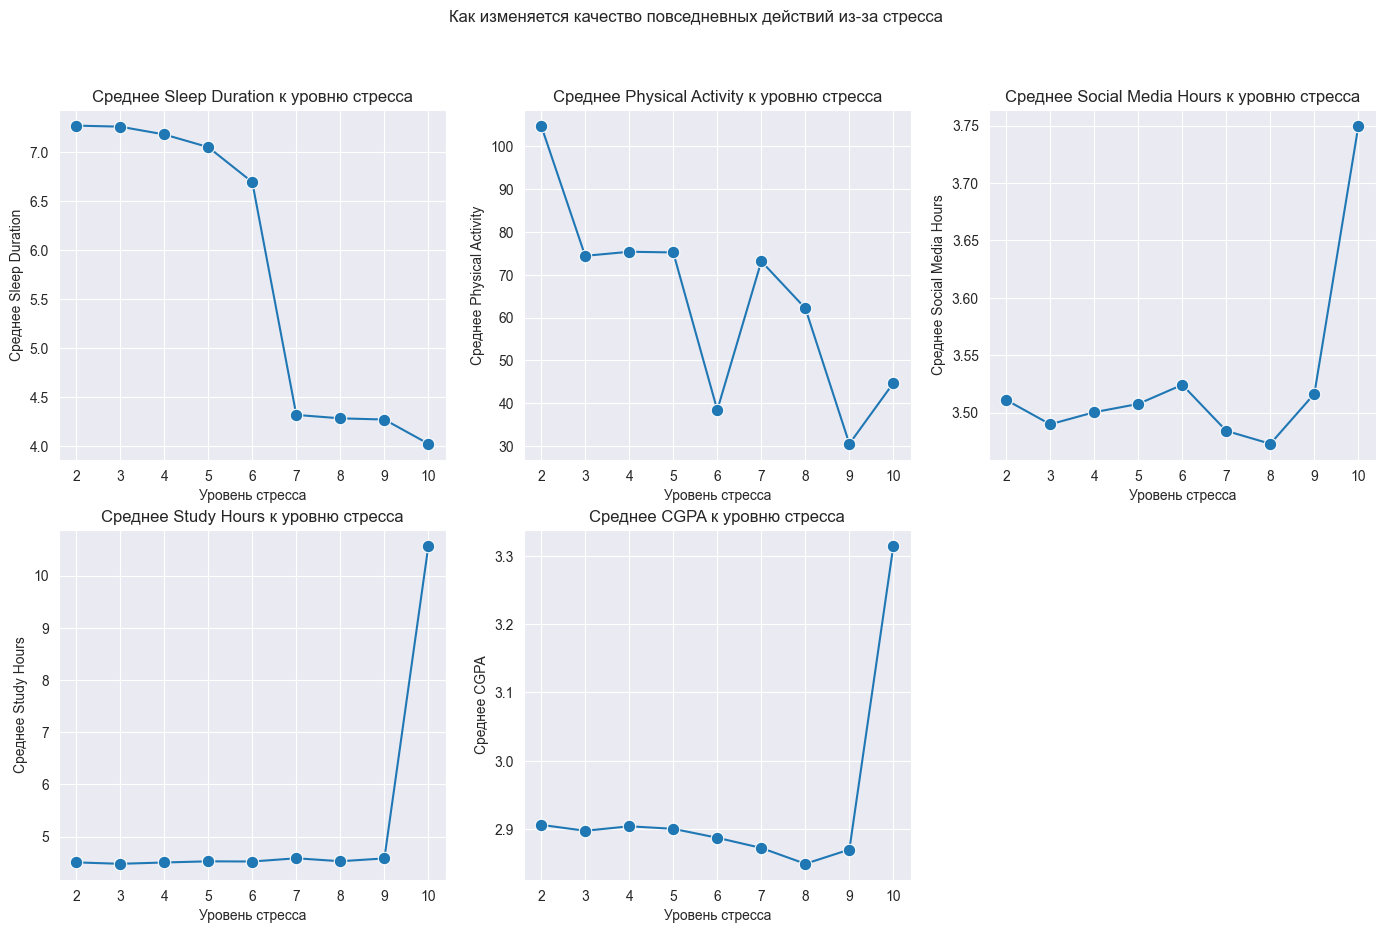

In [13]:
stress_vars = ['Sleep_Duration', 'Physical_Activity', 'Social_Media_Hours',
               'Study_Hours', 'CGPA']

fig, axes = plt.subplots(2, 3, figsize=(17, 10))
axes = axes.flatten()

for i, var in enumerate(stress_vars):
    grouped = df.groupby('Stress_Level')[var].mean().reset_index()
    
    sns.lineplot(
        data=grouped,
        x='Stress_Level',
        y=var,
        marker='o',
        markersize=9,
        ax=axes[i]
    )
    
    axes[i].set_title(f"Среднее {var.replace('_',' ')} к уровню стресса")
    axes[i].set_xlabel("Уровень стресса")
    axes[i].set_ylabel(f"Среднее {var.replace('_',' ')}")

if len(stress_vars) < 6:
    axes.flatten()[len(stress_vars)].set_visible(False)

plt.suptitle("Как изменяется качество повседневных действий из-за стресса")
plt.show()

#### 4. Обработка признаков

In [14]:
df['Gender_numeric'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [15]:
df['Department'].value_counts()

Department
Science        20071
Engineering    20057
Arts           19998
Medical        19964
Business       19910
Name: count, dtype: int64

In [16]:
df['Department_numeric'] = df['Department'].map({'Science': 0, 'Engineering': 1, 'Medical': 2, 'Arts': 3, 'Business': 4})

In [17]:
df

,Student_ID,Age,Gender,Department,CGPA,Sleep_Duration,Study_Hours,Social_Media_Hours,Physical_Activity,Stress_Level,Depression,Gender_numeric,Department_numeric
0,1001,22,Female,Science,3.5000,7.3000,3.3000,3.4000,114,5,False,0,0
1,1002,20,Male,Engineering,2.7200,5.5000,7.2000,6.0000,142,2,False,1,1
2,1003,20,Male,Medical,3.0100,5.4000,2.3000,1.8000,137,3,False,1,2
3,1004,21,Male,Engineering,3.6300,8.1000,2.0000,4.6000,130,3,False,1,1
4,1005,19,Male,Arts,3.1400,6.8000,2.6000,4.3000,4,6,False,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,100996,24,Female,Medical,2.0200,7.0000,0.6000,1.4000,66,4,False,0,2
99996,100997,24,Male,Arts,2.3300,5.0000,3.6000,5.2000,103,3,False,1,3
99997,100998,24,Female,Engineering,2.2300,6.5000,5.8000,4.1000,61,5,False,0,1
99998,100999,19,Male,Engineering,3.6100,6.1000,4.8000,4.9000,116,4,False,1,1


In [18]:
corr_table = df[['Age', 'Gender_numeric', 'Department_numeric', 'CGPA', 'Sleep_Duration', 'Study_Hours', 'Social_Media_Hours', 'Physical_Activity', 	'Stress_Level', 'Depression']].corr()

<Axes: >

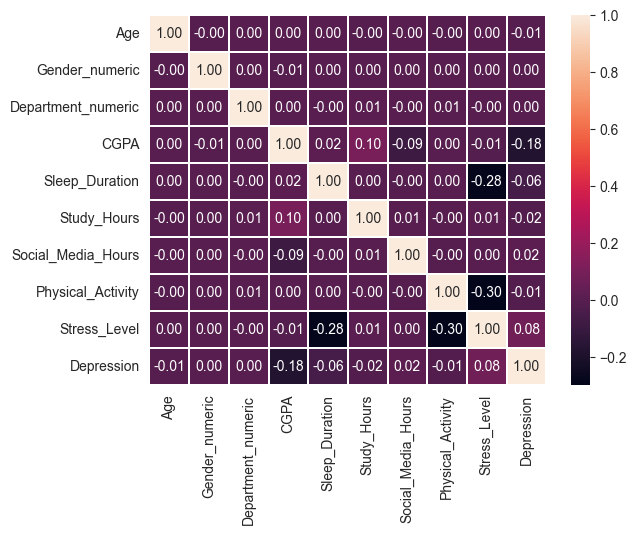

In [19]:
sns.heatmap(corr_table, annot=True, linewidths=0.2, fmt = '.2f')

Исходя из таблицы корреляций, мы можем заметить, что зависимости между признаками очень слабые или их вовсе нет. Прослеживается малая зависимость между часами обучения и средним баллом.

### 5. Обучение моделей
#### Выбор моделей
**Почему выбрали эти модели:**

**Random Forest:**
- Хорошо работает с табличными данными
- Устойчив к выбросам
- Показывает важность признаков
- Не требует масштабирования данных

**Нейронная сеть:**
- Улавливает сложные нелинейные зависимости
- Хорошо масштабируется на больших данных
- Автоматически извлекает признаки
- Высокая гибкость архитектуры

### Обучение модели классификации

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

In [21]:

X = df.drop(['Student_ID', 'Gender', 'Department', 'Depression'], axis=1)
y = df['Depression']
y = df['Depression'].astype(int)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [24]:
rf = RandomForestClassifier(
    n_estimators=350,
    max_depth=10,
    min_samples_split=5,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

rf.fit(X_resampled, y_resampled)

,n_estimators,350
,criterion,'gini'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [25]:
y_pred = rf.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.71      0.81     26981
           1       0.18      0.56      0.27      3019

    accuracy                           0.69     30000
   macro avg       0.56      0.63      0.54     30000
weighted avg       0.86      0.69      0.75     30000


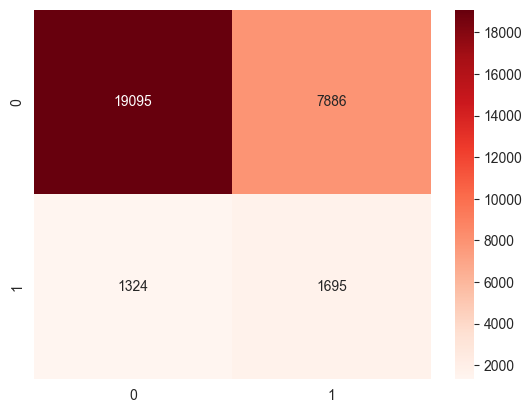

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.show()

### Обучение нейронной модели

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_nn = tf.keras.Sequential([
        tf.keras.layers.Dense(64, input_shape=(9,), activation='relu', name='input'),
        tf.keras.layers.Dense(32, activation='relu', name='hidden_1'),
        tf.keras.layers.Dense(32, activation='relu', name='hidden_2'),
        tf.keras.layers.Dense(1, activation='sigmoid', name='output')
    ])

model_nn.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

class_weights = {
    0: 1.0,
    1: 4.0,
}

history = model_nn.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64,
    class_weight=class_weights,
    verbose=1
)

Epoch 1/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 552us/step - accuracy: 0.8529 - loss: 0.7498 - val_accuracy: 0.8450 - val_loss: 0.4164
Epoch 2/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.8343 - loss: 0.7303 - val_accuracy: 0.8076 - val_loss: 0.4256
Epoch 3/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.8244 - loss: 0.7252 - val_accuracy: 0.8462 - val_loss: 0.4017
Epoch 4/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step - accuracy: 0.8264 - loss: 0.7220 - val_accuracy: 0.8581 - val_loss: 0.4094
Epoch 5/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.8234 - loss: 0.7199 - val_accuracy: 0.8744 - val_loss: 0.4053
Epoch 6/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.8294 - loss: 0.7181 - val_accuracy: 0.7859 - val_loss: 0.4008
Epoch 7/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.8217 - loss: 0.7166 - val_accuracy: 0.8599 - val_loss: 0.3968
Epoch 8/100
875/875 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.8265 - loss: 0

In [29]:
print(model_nn.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_1 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_2 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,429 (44.65 KB)

 Trainable params: 3,809 (14.88 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,620 (29.77 KB)

None


In [30]:
loss, accuracy = model_nn.evaluate(X_test_scaled, y_test)
print(f'Точность модели на тестовых данных: {accuracy * 100:.2f}%')

938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 301us/step - accuracy: 0.8019 - loss: 0.4305
Точность модели на тестовых данных: 80.19%


In [31]:
predictions = model_nn.predict(X_test_scaled)

938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 224us/step


In [32]:
y_pred_proba = predictions.flatten()

In [33]:
y_pred_proba

array([0.07163092, 0.46347684, 0.14443496, ..., 0.10867288, 0.02990125,
       0.9538461 ], shape=(30000,), dtype=float32)

In [34]:
y_pred = (y_pred_proba >= 0.5).astype(int)

In [35]:
y_pred

array([0, 0, 0, ..., 0, 0, 1], shape=(30000,))

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,
                           target_names=['No Depression', 'Depression']))

               precision    recall  f1-score   support

No Depression       0.92      0.85      0.89     26981
   Depression       0.21      0.35      0.26      3019

     accuracy                           0.80     30000
    macro avg       0.57      0.60      0.57     30000
 weighted avg       0.85      0.80      0.82     30000


### 6. Сравнение моделей

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]
y_pred_nn = (model_nn.predict(X_test_scaled).flatten() >= 0.5).astype(int)
y_pred_proba_nn = model_nn.predict(X_test_scaled).flatten()

rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1': f1_score(y_test, y_pred_rf),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_rf)
}

nn_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_nn),
    'Precision': precision_score(y_test, y_pred_nn),
    'Recall': recall_score(y_test, y_pred_nn),
    'F1': f1_score(y_test, y_pred_nn),
    'ROC-AUC': roc_auc_score(y_test, y_pred_proba_nn)
}
comparison_df = pd.DataFrame({
    'Metric': list(rf_metrics.keys()),
    'Random Forest': list(rf_metrics.values()),
    'Neural Network': list(nn_metrics.values()),
})

938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 208us/step
938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 203us/step


Сравнение моделей:
   Metric  Random Forest  Neural Network
 Accuracy         0.6930          0.8019
Precision         0.1769          0.2108
   Recall         0.5614          0.3531
       F1         0.2690          0.2640
  ROC-AUC         0.6730          0.6689


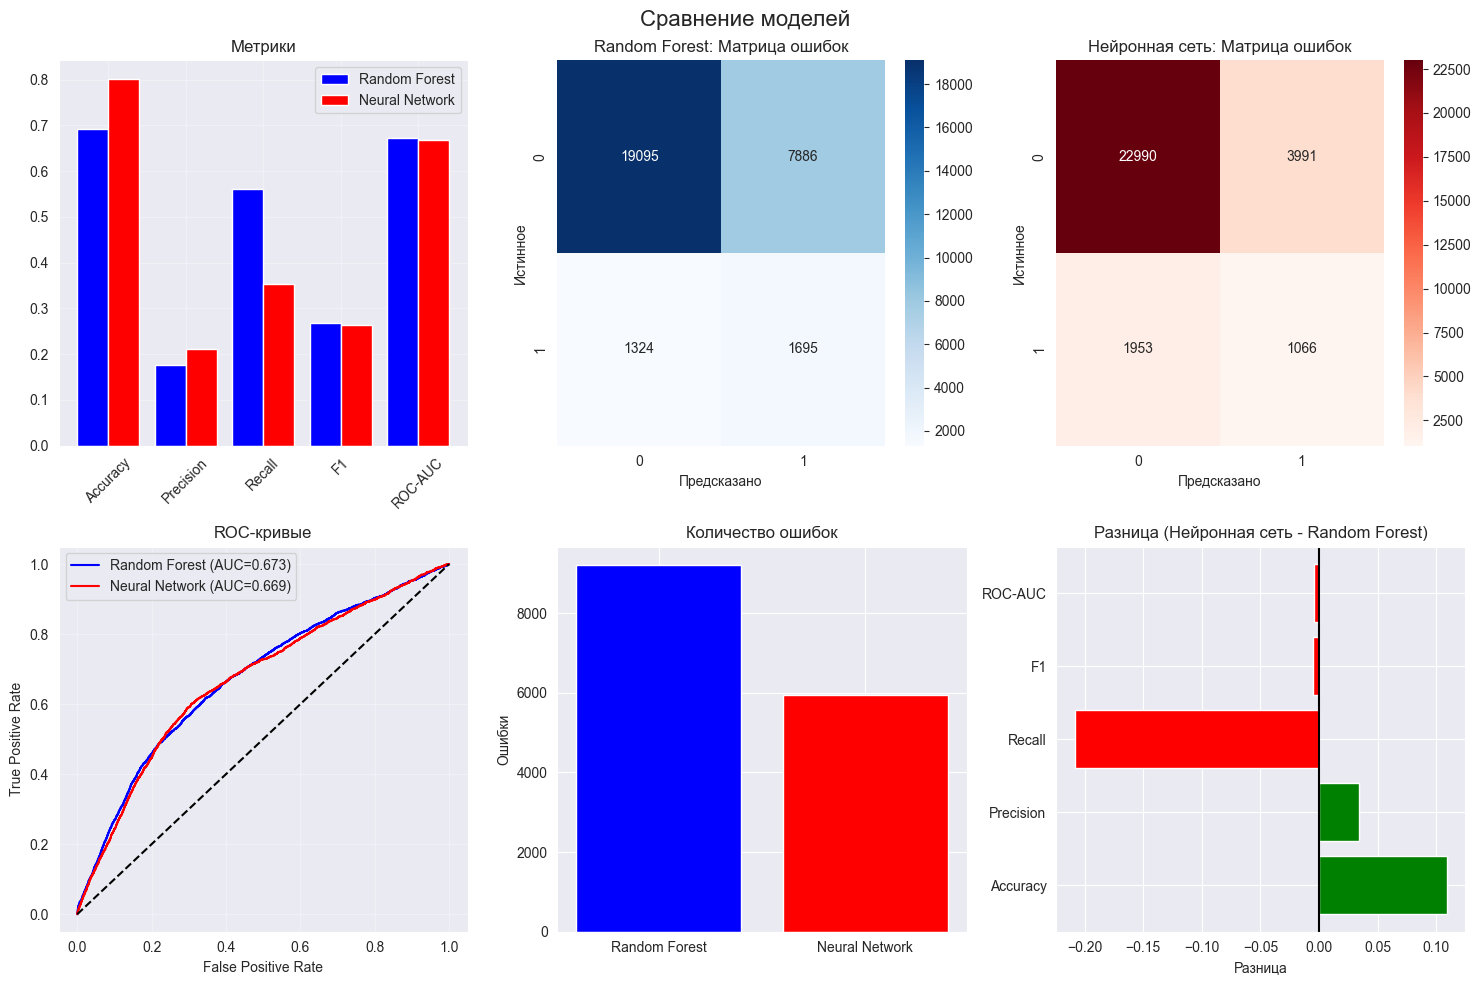

In [42]:
from sklearn.metrics import roc_curve

print("Сравнение моделей:")
print(comparison_df.to_string(index=False))

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Сравнение моделей', fontsize=16)

metrics = comparison_df['Metric'].values
rf_values = comparison_df['Random Forest'].values
nn_values = comparison_df['Neural Network'].values

axes[0, 0].bar(np.arange(len(metrics))-0.2, rf_values, 0.4, label='Random Forest', color='blue')
axes[0, 0].bar(np.arange(len(metrics))+0.2, nn_values, 0.4, label='Neural Network', color='red')
axes[0, 0].set_xticks(range(len(metrics)))
axes[0, 0].set_xticklabels(metrics, rotation=45)
axes[0, 0].set_title('Метрики')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Random Forest: Матрица ошибок')
axes[0, 1].set_xlabel('Предсказано')
axes[0, 1].set_ylabel('Истинное')

conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Reds', ax=axes[0, 2])
axes[0, 2].set_title('Нейронная сеть: Матрица ошибок')
axes[0, 2].set_xlabel('Предсказано')
axes[0, 2].set_ylabel('Истинное')

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_proba_nn)

axes[1, 0].plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={rf_metrics["ROC-AUC"]:.3f})', color='blue')
axes[1, 0].plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC={nn_metrics["ROC-AUC"]:.3f})', color='red')
axes[1, 0].plot([0, 1], [0, 1], 'k--')
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('ROC-кривые')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].bar(['Random Forest', 'Neural Network'], 
               [len(y_test[y_pred_rf != y_test]), len(y_test[y_pred_nn != y_test])],
               color=['blue', 'red'])
axes[1, 1].set_title('Количество ошибок')
axes[1, 1].set_ylabel('Ошибки')

diff_values = nn_values - rf_values
colors = ['green' if x > 0 else 'red' if x < 0 else 'gray' for x in diff_values]
axes[1, 2].barh(metrics, diff_values, color=colors)
axes[1, 2].axvline(x=0, color='black', linestyle='-')
axes[1, 2].set_title('Разница (Нейронная сеть - Random Forest)')
axes[1, 2].set_xlabel('Разница')

plt.tight_layout()
plt.show()

### 7. Вывод

**Преимущество нейронной сети:**
- Лучшая общая точность (80% vs 69%)
- Меньше ложных диагнозов (Precision 21% vs 18%)

**Преимущество Random Forest:**
- Лучше находит реальные случаи депрессии (Recall 56% vs 35%)
- Пропускает меньше больных

**Ключевая проблема:**
Обе модели часто ошибаются, когда ставят диагноз депрессии (~80% ошибок)

##### Нейронная сеть лучше в общей точности, но Random Forest эффективнее обнаруживает реальные случаи депрессии. 
